In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.Gender.value_counts(dropna=False)


Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

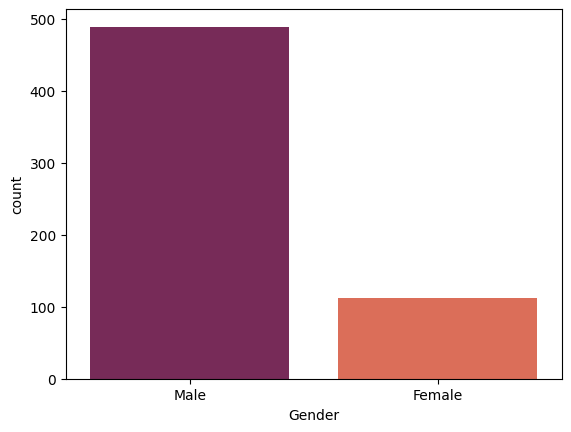

In [7]:
sns.countplot(x="Gender", data=df, palette="rocket")
plt.show()

In [8]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


In [9]:
df.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

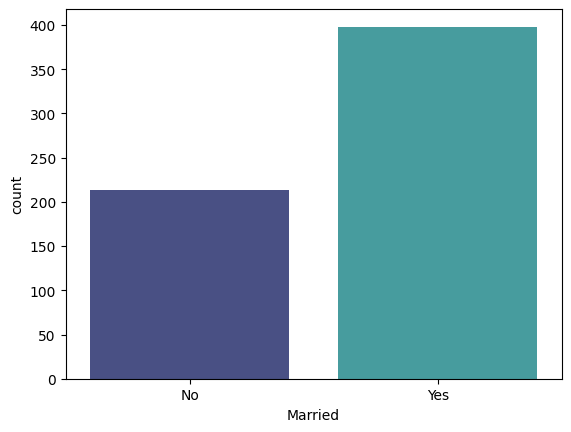

In [10]:
sns.countplot(x="Married", data=df, palette="mako")
plt.show()

In [11]:
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))

Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


In [12]:
df.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

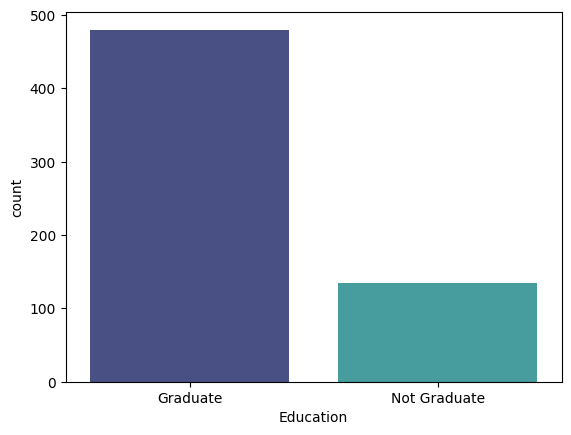

In [13]:
sns.countplot(x="Education", data=df, palette="mako")
plt.show()

In [14]:
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("Percentage of Graduates: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Percentage of NotGraduates: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Education))*100)))

Percentage of Graduates: 78.18%
Percentage of NotGraduates: 21.82%
Missing values percentage: 0.00%


In [15]:
df.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

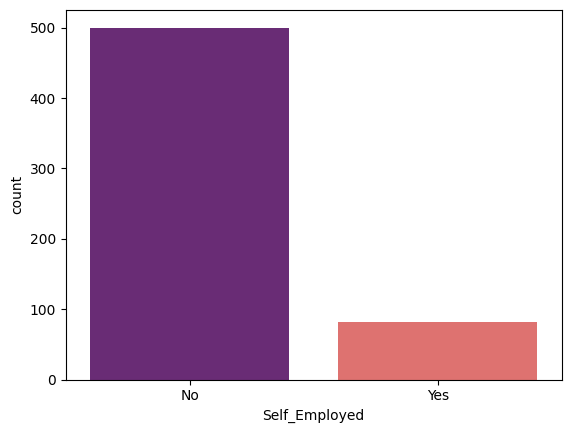

In [16]:
sns.countplot(x="Self_Employed", data=df, palette="magma")
plt.show()

In [17]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

Percentage of Not self employed: 81.43%
Percentage of self employed: 13.36%
Missing values percentage: 5.21%


In [18]:
df.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

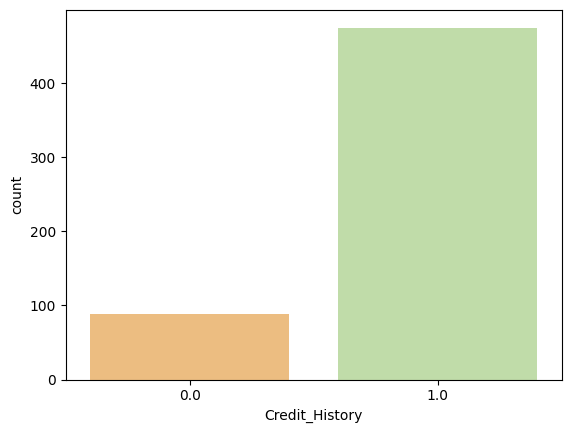

In [19]:
sns.countplot(x="Credit_History", data=df, palette="Spectral")
plt.show()

In [20]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


In [21]:
df.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

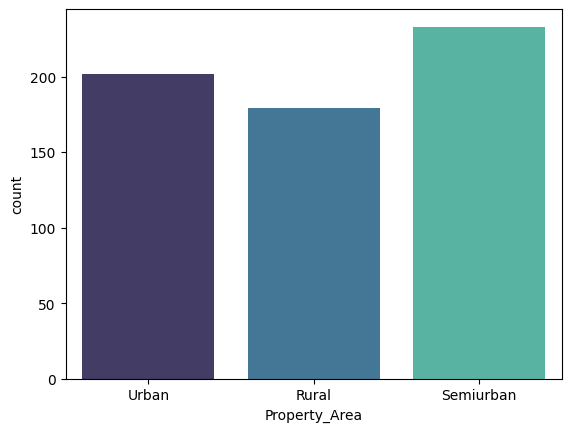

In [22]:
sns.countplot(x="Property_Area", data=df, palette="mako")
plt.show()

In [23]:
countUrban = len(df[df.Property_Area == 'Urban'])
countNotRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countNan = len(df[df.Property_Area.isnull()])

print("Percentage of Urban Applicants: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Percentage of Rural applicant: {:.2f}%".format((countNotRural / (len(df.Property_Area))*100)))
print("Percentage of Semi urban applicant: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

Percentage of Urban Applicants: 32.90%
Percentage of Rural applicant: 29.15%
Percentage of Semi urban applicant: 37.95%
Missing values percentage: 8.14%


In [24]:
df.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

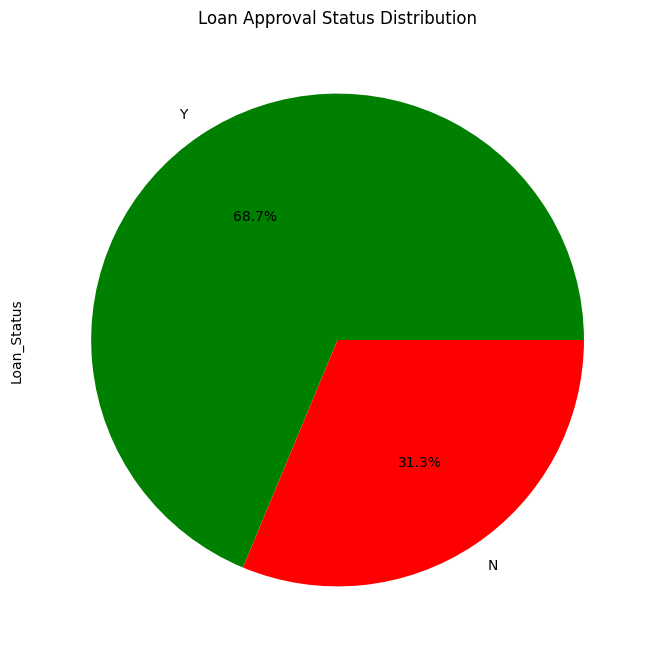

In [25]:
plt.figure(figsize=(8, 8))
df['Loan_Status'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green','red'])
plt.title('Loan Approval Status Distribution')
plt.show()


In [26]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


In [27]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)


In [29]:
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
df.duplicated().sum()

0

In [31]:
def bar_chart(col):
    Approved = df[df["Loan_Status"]=="Y"][col].value_counts()
    Disapproved = df[df["Loan_Status"]=="N"][col].value_counts()

    df1 = pd.DataFrame([Approved, Disapproved])
    df1.index = ["Approved", "Disapproved"]
    df1.plot(kind="bar")

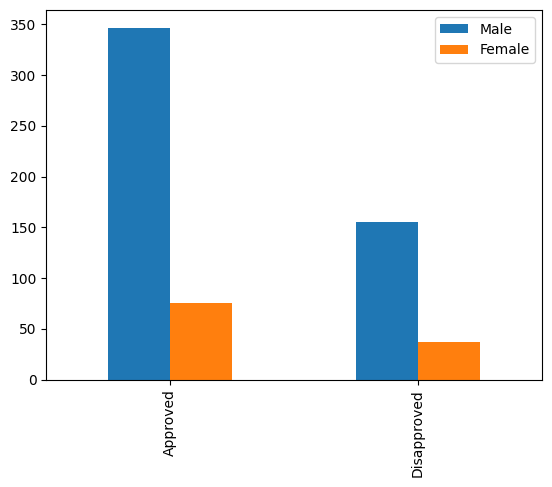

In [32]:
bar_chart("Gender")

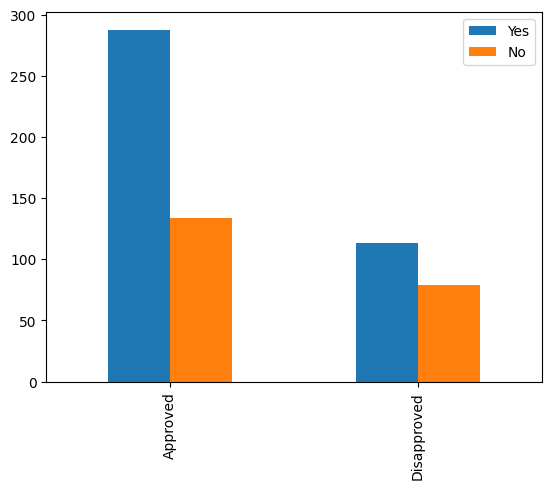

In [33]:
bar_chart("Married")

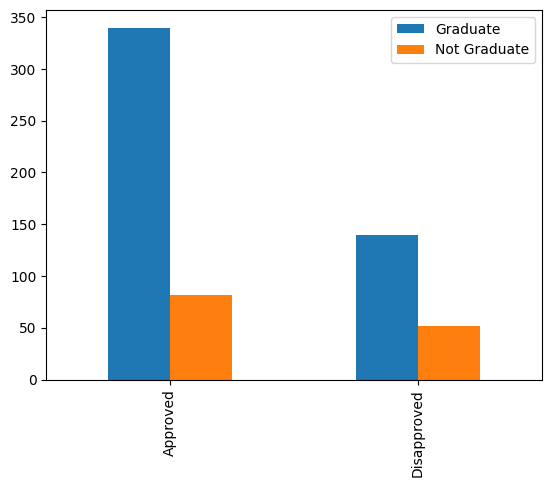

In [34]:
bar_chart("Education")

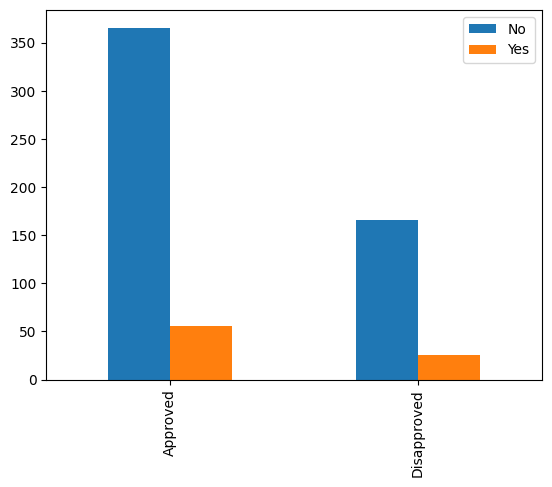

In [35]:
bar_chart("Self_Employed")

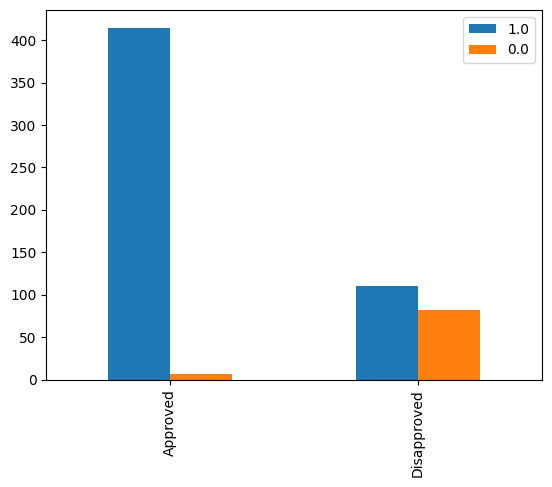

In [36]:
bar_chart("Credit_History")

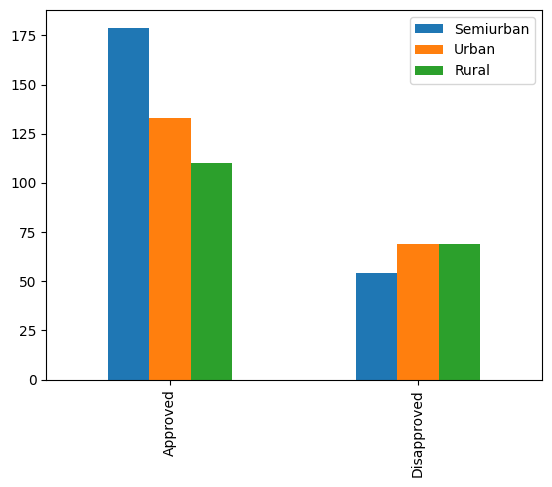

In [37]:
bar_chart("Property_Area")

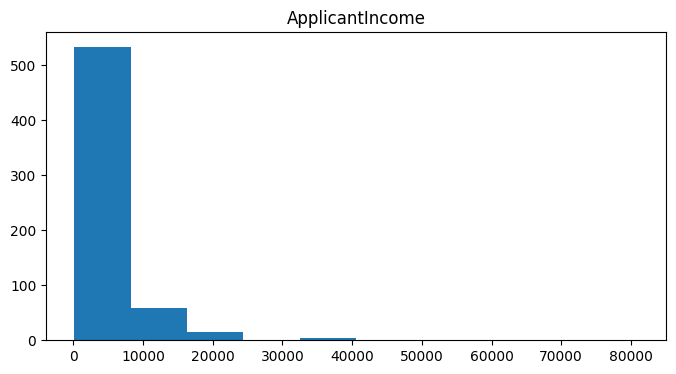

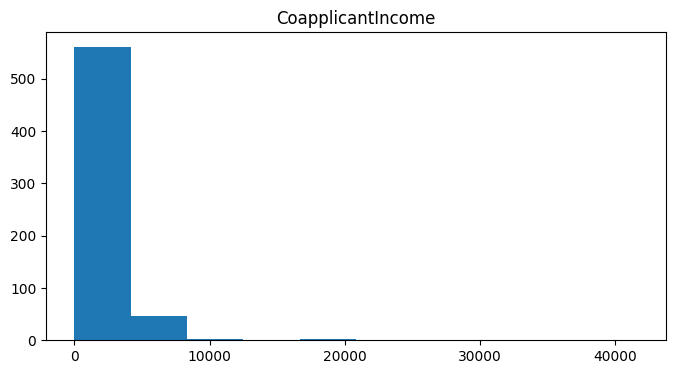

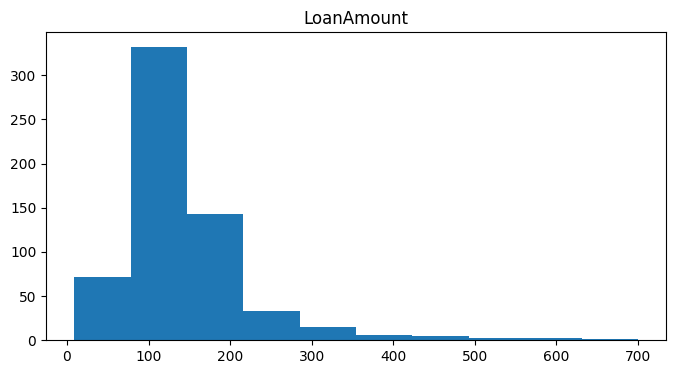

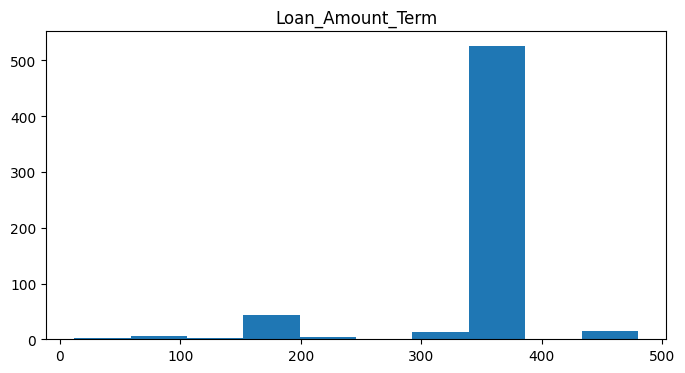

In [38]:
num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
for column in num:
    plt.figure(figsize=(8,4))
    plt.hist(df[column])
    plt.title(column)
    plt.show()

In [39]:
df = df.drop(['Loan_ID'], axis = 1)
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [40]:
df = pd.get_dummies(df)
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}

df.rename(columns=new, inplace=True)
print(df.head())
df.shape

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History  Gender  Married  Dependents_0  Dependents_1  Dependents_2  \
0             1.0       1        0             1             0             0   
1             1.0       1        1             0             1             0   
2             1.0       1        1             1             0             0   
3             1.0       1        1             1             0             0   
4             1.0       1        0             1             0             0   

   Dependents_3+  Education  Self_Employed  Property_Area_Rural  \
0              0         

(614, 17)

<Figure size 1200x600 with 0 Axes>

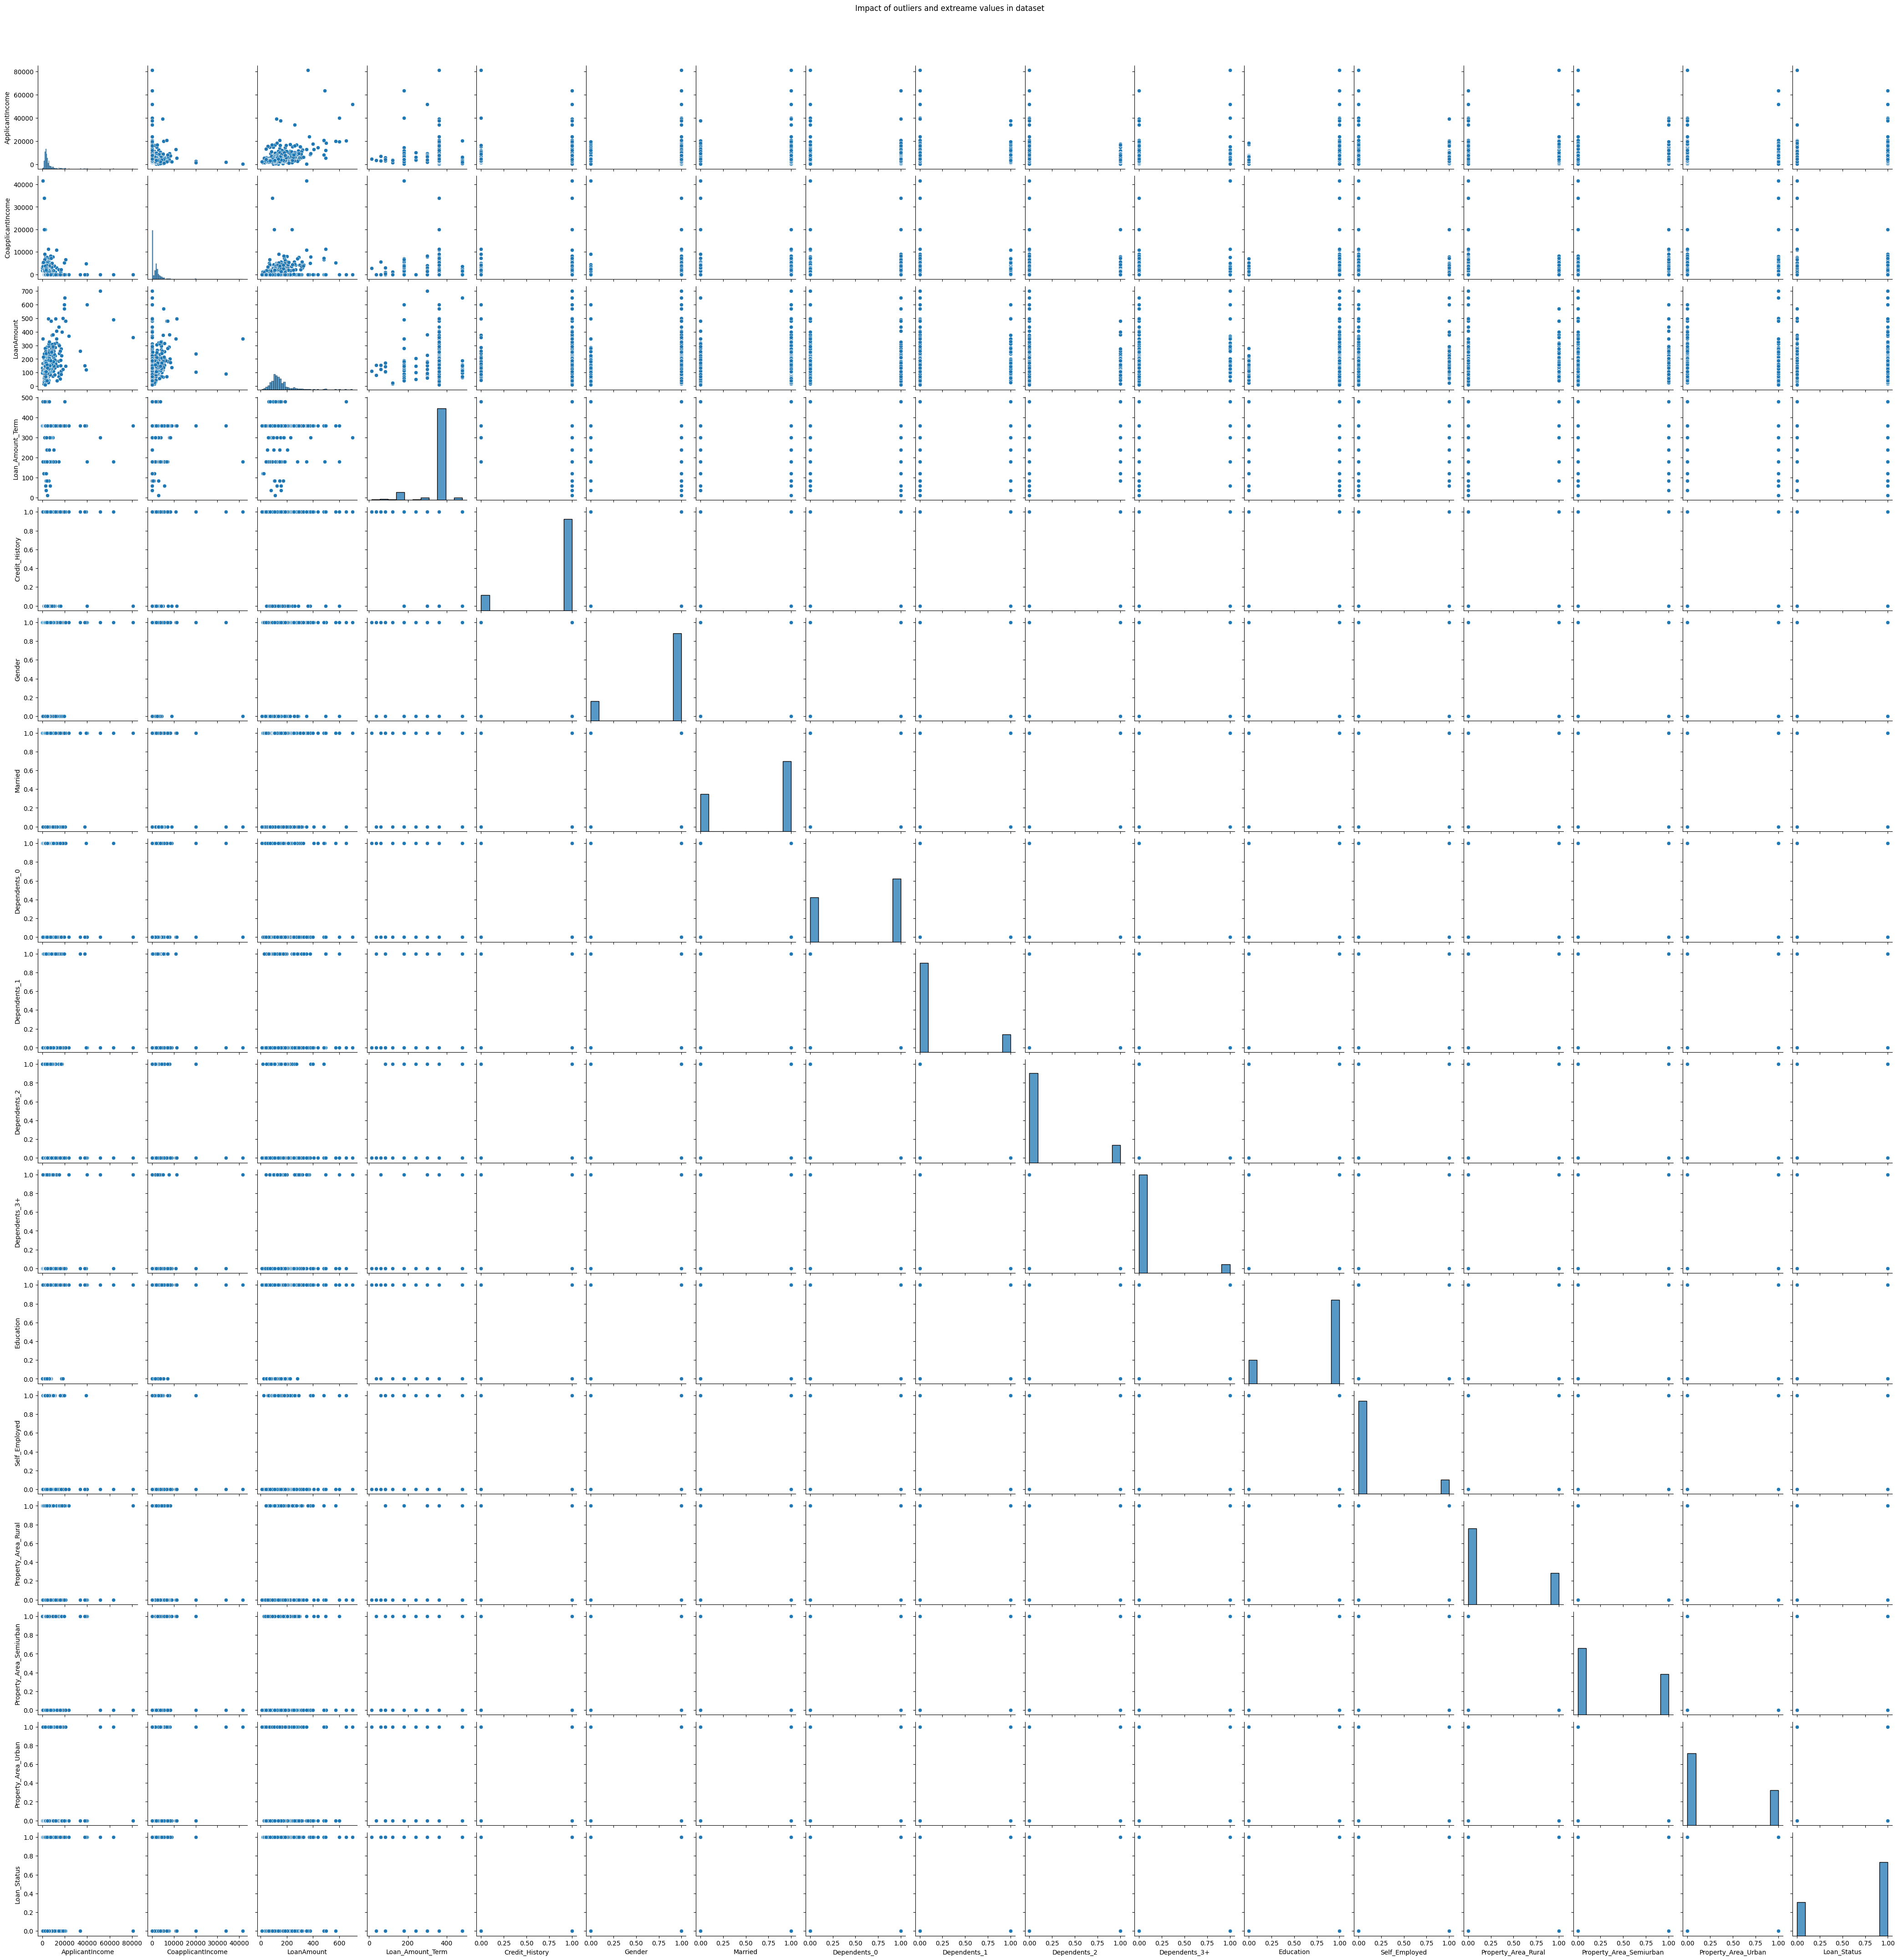

In [41]:
plt.figure(figsize=(12, 6))
sns.pairplot(df)
plt.suptitle('Impact of outliers and extreame values in dataset', y=1.02)
plt.show()

In [42]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
aaf=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(aaf.head())
print(aaf.shape)
df=aaf
ddf=df['Loan_Status']

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              5849                0.0  146.412162             360.0   
4              6000                0.0  141.000000             360.0   
13             1853             2840.0  114.000000             360.0   
15             4950                0.0  125.000000             360.0   
19             2600             3500.0  115.000000             360.0   

    Credit_History  Gender  Married  Dependents_0  Dependents_1  Dependents_2  \
0              1.0       1        0             1             0             0   
4              1.0       1        0             1             0             0   
13             1.0       1        0             1             0             0   
15             1.0       1        0             1             0             0   
19             1.0       1        1             1             0             0   

    Dependents_3+  Education  Self_Employed  Property_Area_Rural  \
0           

<Figure size 1200x600 with 0 Axes>

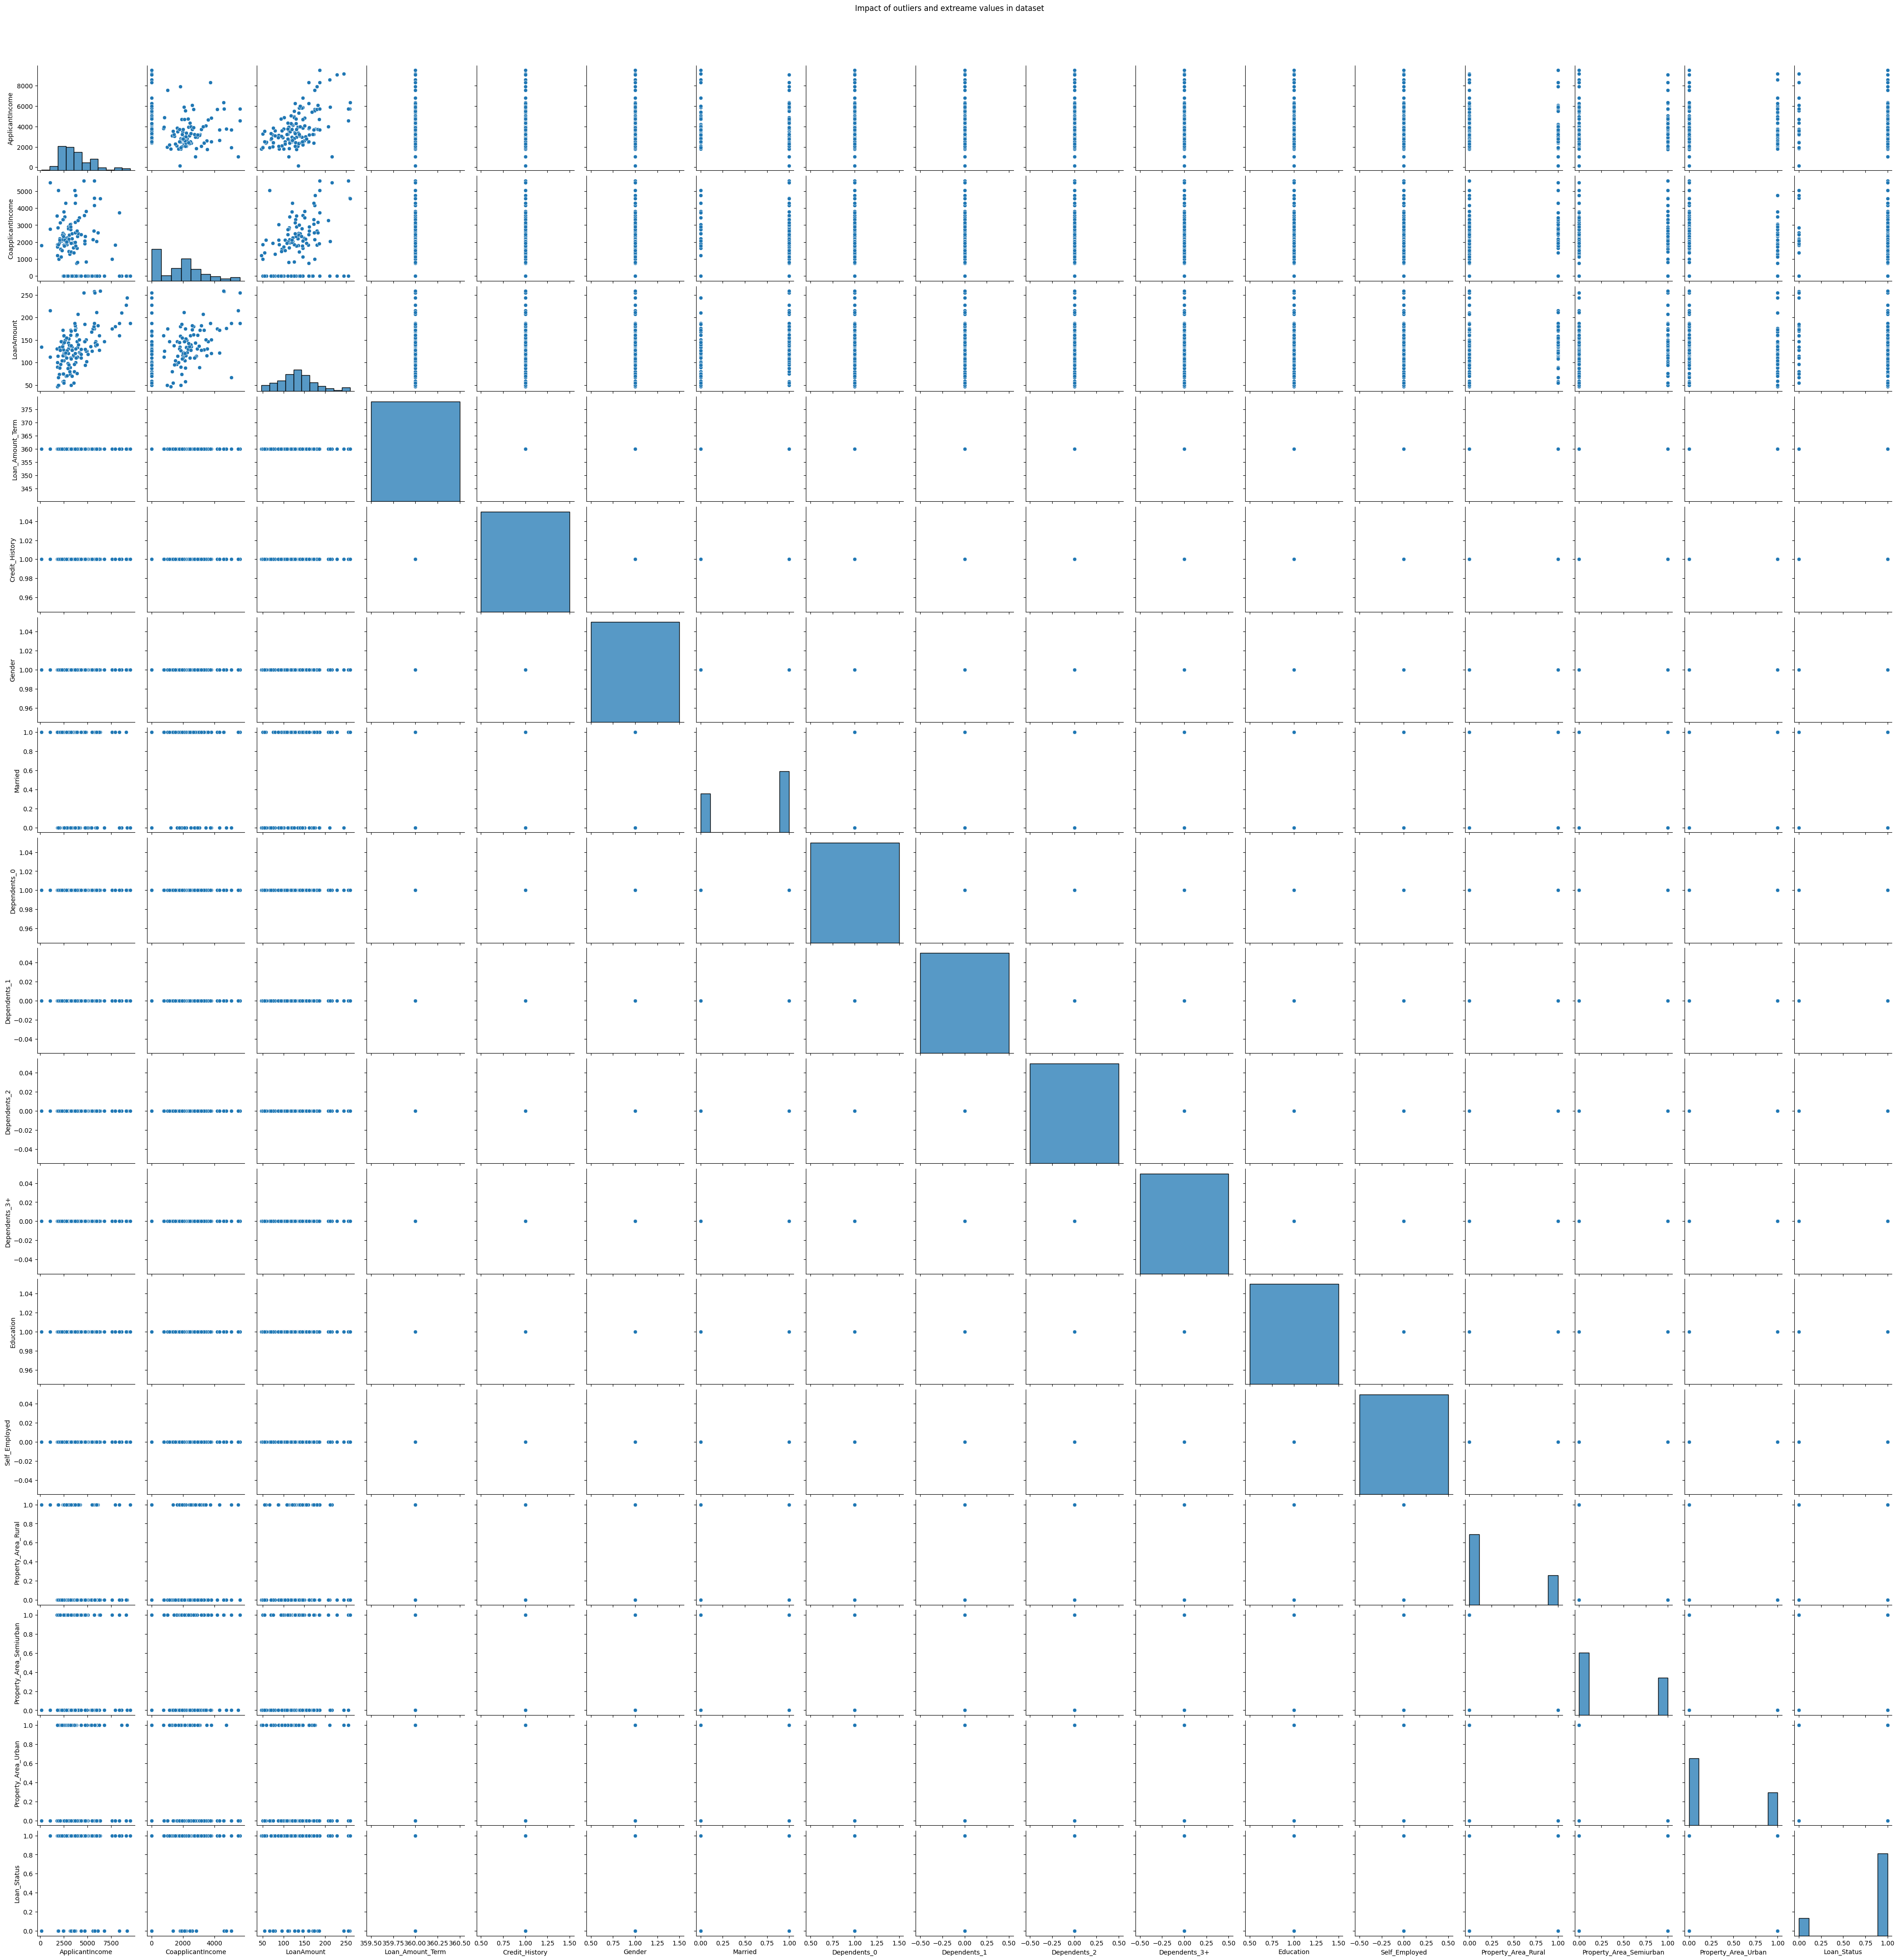

In [43]:
plt.figure(figsize=(12, 6))
sns.pairplot(df)
plt.suptitle('Impact of outliers and extreame values in dataset', y=1.02)
plt.show()

In [44]:
df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)
print(df.head())

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         76.478755           0.000000   12.100089             360.0   
4         77.459667           0.000000   11.874342             360.0   
13        43.046487          53.291650   10.677078             360.0   
15        70.356236           0.000000   11.180340             360.0   
19        50.990195          59.160798   10.723805             360.0   

    Credit_History  Gender  Married  Dependents_0  Dependents_1  Dependents_2  \
0              1.0       1        0             1             0             0   
4              1.0       1        0             1             0             0   
13             1.0       1        0             1             0             0   
15             1.0       1        0             1             0             0   
19             1.0       1        1             1             0             0   

    Dependents_3+  Education  Self_Employed  Property_Area_Rural  \
0           

In [45]:
correlation_matrix =df.corr()
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
ApplicantIncome,1.000000,-0.332852,0.513330,NaN,NaN,NaN,-0.107902,NaN,NaN,NaN,NaN,NaN,NaN,-0.037838,0.047180,-0.011903,-0.077932
CoapplicantIncome,-0.332852,1.000000,0.280218,NaN,NaN,NaN,0.333135,NaN,NaN,NaN,NaN,NaN,NaN,0.202981,0.085973,-0.285016,0.076706
LoanAmount,0.513330,0.280218,1.000000,NaN,NaN,NaN,0.222880,NaN,NaN,NaN,NaN,NaN,NaN,0.089811,0.088073,-0.177586,-0.105901
Loan_Amount_Term,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_History,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,-0.107902,0.333135,0.222880,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.052555,0.089538,-0.143016,0.104691
Dependents_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


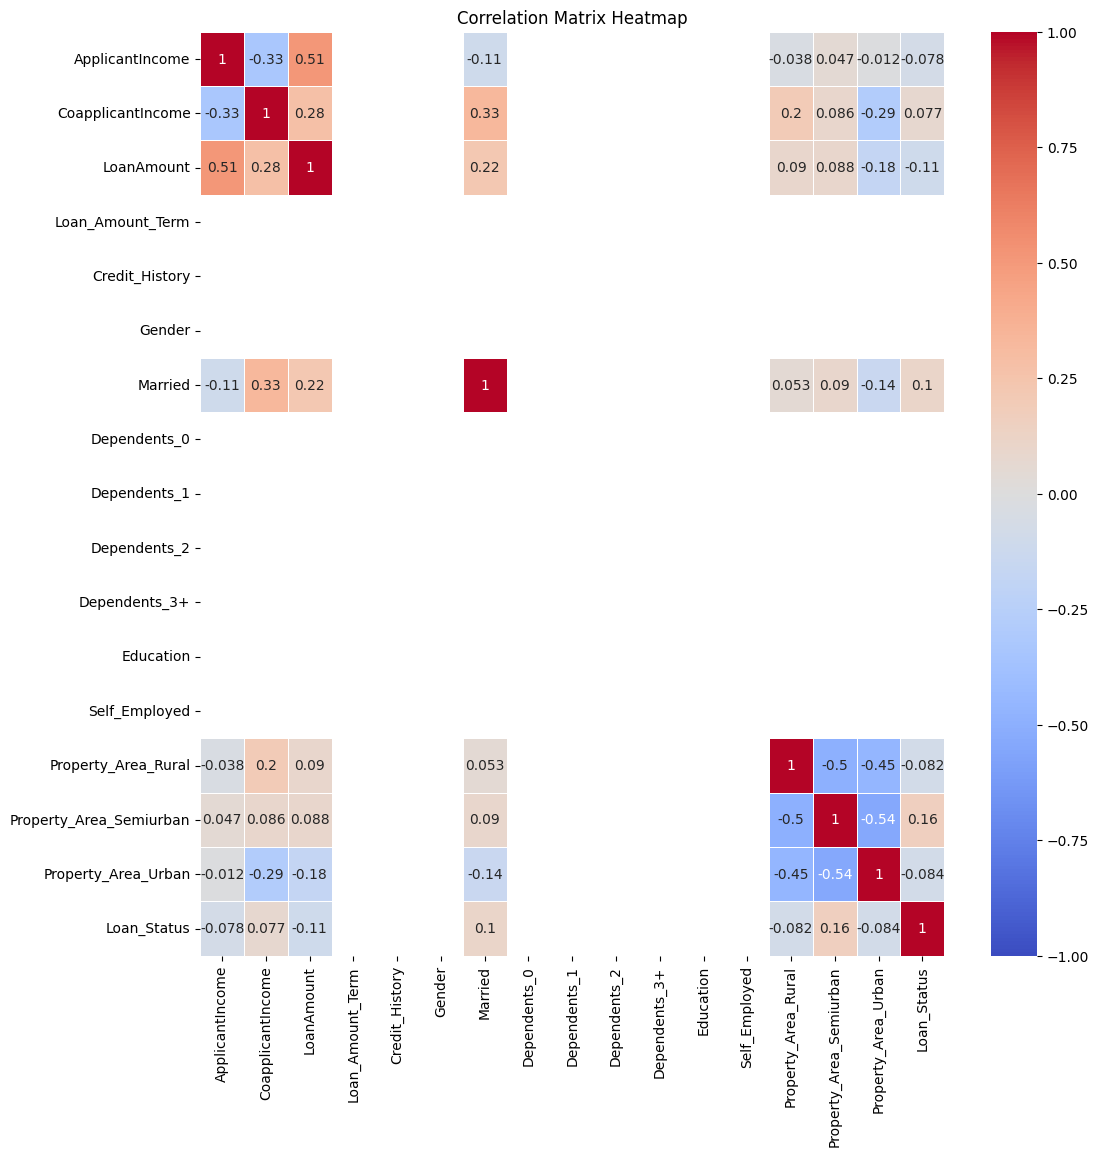

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', linewidths=.5,vmin=-1.0,center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

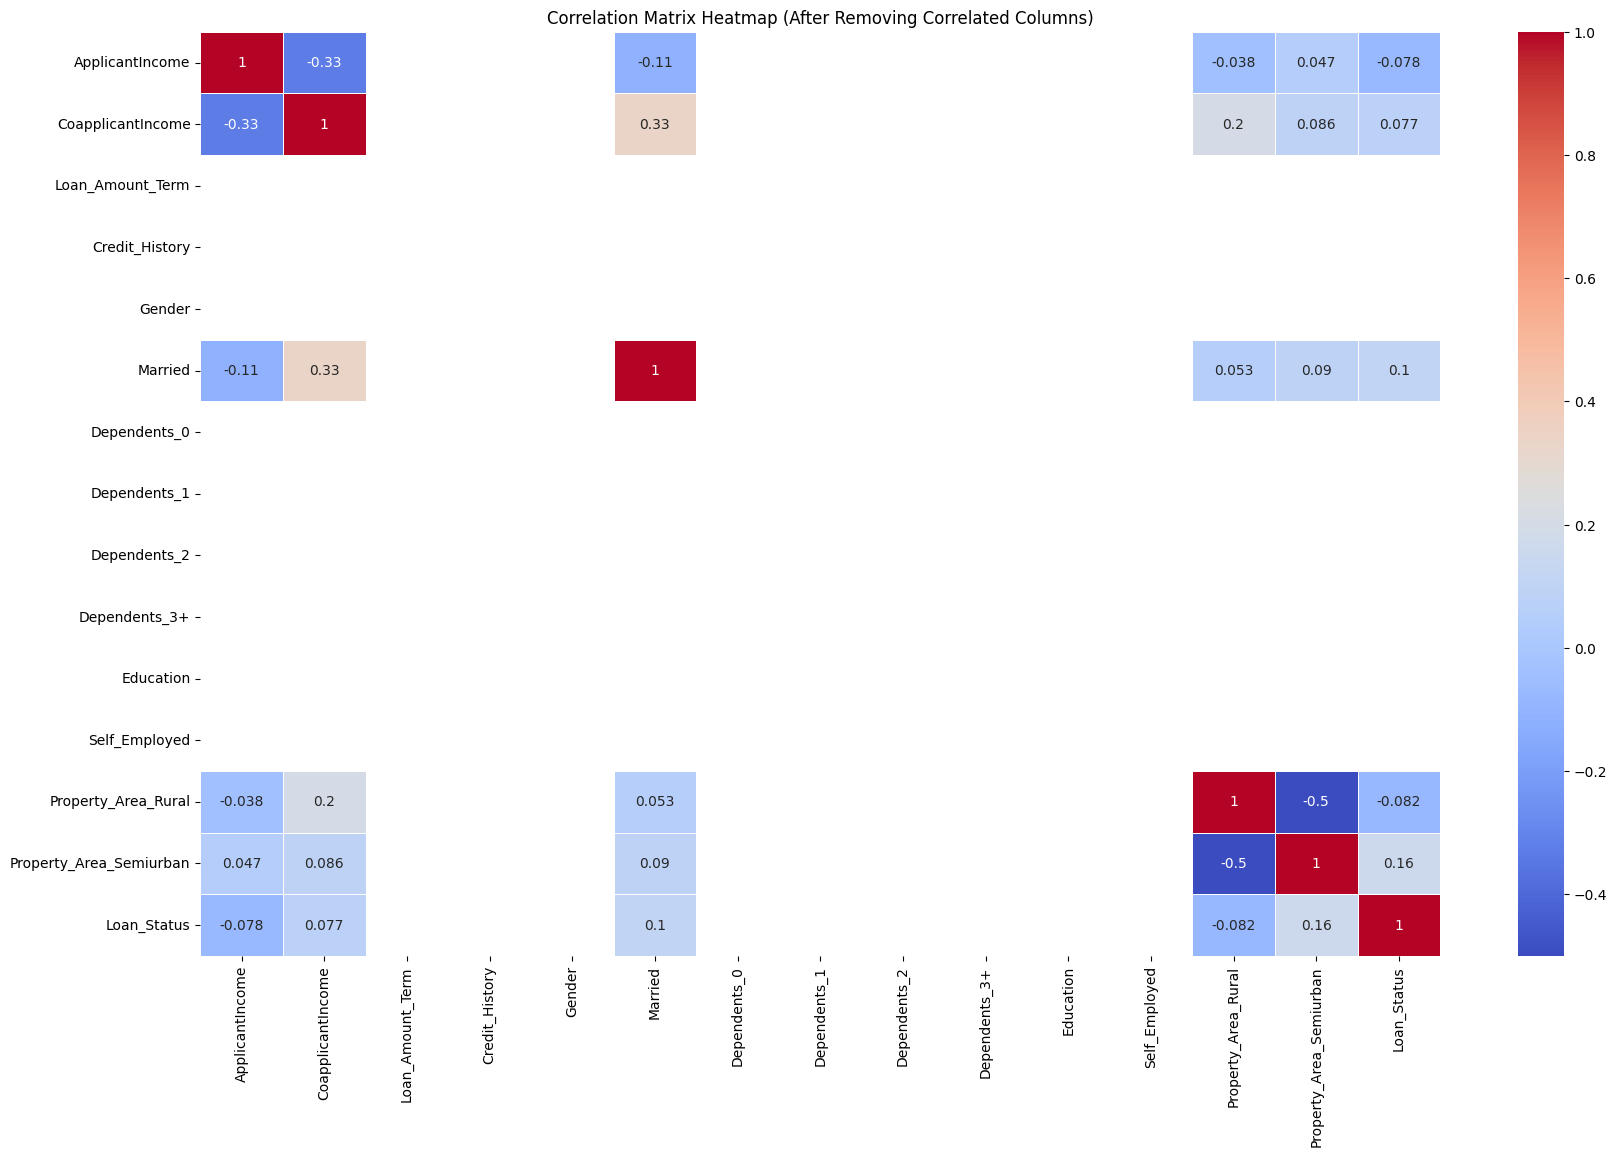

In [47]:
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

df_filtered = df.drop(columns=correlated_features)
correlation_matrix_filtered = df_filtered.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap (After Removing Correlated Columns)')
plt.show()

In [48]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg_model = LogisticRegression()
rfe = RFE(estimator=logreg_model, n_features_to_select=6)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)
print("Selected Features:", selected_features)


Selected Features: Index(['ApplicantIncome', 'LoanAmount', 'Married', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [49]:
df=df[selected_features]
df.shape

(136, 6)

In [50]:
X = df
y = ddf
print(X.shape,y.shape)

(136, 6) (136,)


In [51]:
pip install imblearn

In [52]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X,y)

In [53]:
X = MinMaxScaler().fit_transform(X)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (179, 6) (179,)
Test set: (45, 6) (45,)


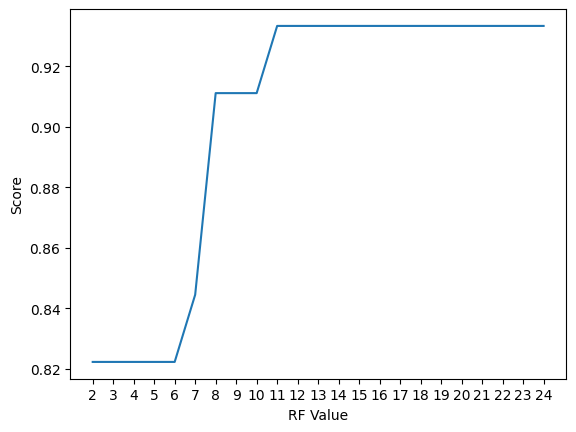

Random Forest Accuracy:  93.33%


In [55]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))




In [56]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.91      0.84      0.87        25

    accuracy                           0.87        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45

[[18  2]
 [ 4 21]]
LR accuracy: 86.67%


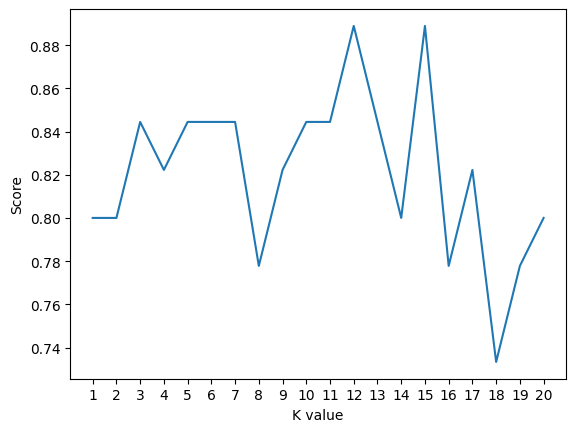

KNN best accuracy: 88.89%


In [57]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [58]:
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.8       , 0.8       , 0.84444444, 0.82222222, 0.84444444,
       0.84444444, 0.84444444, 0.77777778, 0.82222222])

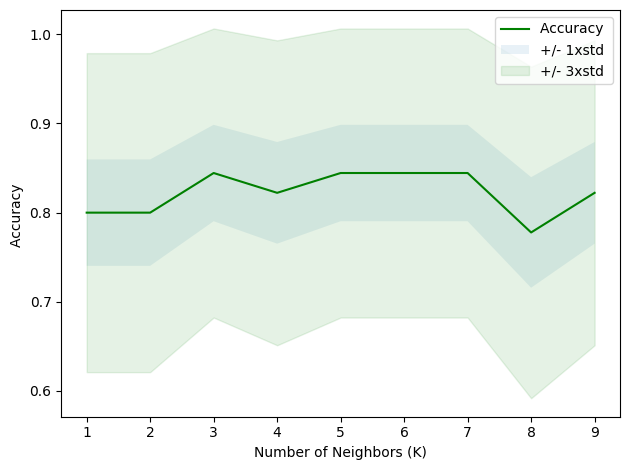

In [59]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [60]:
print( "The best accuracy was with", mean_acc.max(), "which was K=", mean_acc.argmax()+1)

The best accuracy was with 0.8444444444444444 which was K= 3


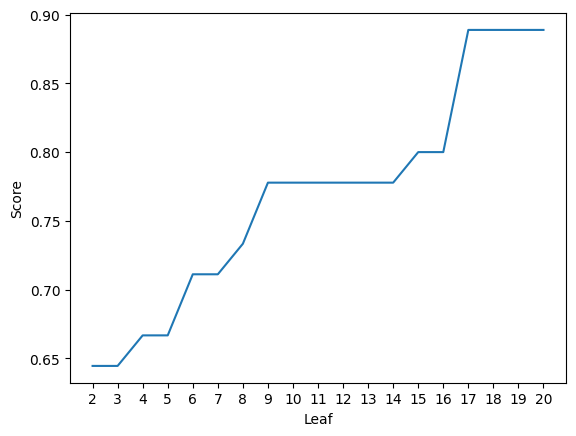

Decision Tree Accuracy: 88.89%


In [61]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))

plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

In [62]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.86      0.96      0.91        25

    accuracy                           0.89        45
   macro avg       0.90      0.88      0.89        45
weighted avg       0.89      0.89      0.89        45

[[16  4]
 [ 1 24]]
SVC accuracy: 88.89%


In [65]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.88      0.92      0.90        25

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45

[[17  3]
 [ 2 23]]
Gradient Boosting accuracy: 88.89%


In [66]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors',
                                  'SVM', 'Decision Tree',
                                  'Random Forest', 'Gradient Boost'],
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100,
                                     DTAcc*100, RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
4,Random Forest,93.333333
1,K Neighbors,88.888889
2,SVM,88.888889
3,Decision Tree,88.888889
5,Gradient Boost,88.888889
0,Logistic Regression,86.666667


In [67]:
import joblib
joblib.dump(KNclassifier, "mymodel.pkl")
model = joblib.load('mymodel.pkl' )
print(X_test[0])
model.predict([X_test[1]])[0]

[0.56633493 0.42804582 0.         0.         0.         1.        ]


1